In [25]:
# read in the data
import pandas as pd
import numpy as np

# Read in "fashion-mnist_train"
fashion_train = pd.read_csv('fashion-mnist_train.csv')

# Read in "fashion-mnist_test"
fashion_test = pd.read_csv('fashion-mnist_test.csv')

fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Show a single variable from the dataset

* Just to get a handle on how the data is organized, let's look at a single variable from the dataset in image form

Picture of:  Trouser


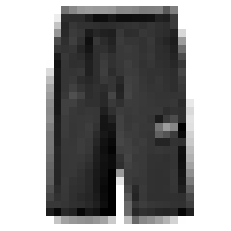

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt

clothing_types = {
0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot',
}

some_clothing = fashion_test.iloc[9999]

# get the value of the first element in the series|
label = some_clothing.get('label')
some_clothing = some_clothing.drop('label', axis=0)
# remove the "label" row
some_clothing_image = some_clothing.values.reshape(28, 28)

print("Picture of: ", clothing_types[label])

plt.imshow(some_clothing_image, cmap="binary")
plt.axis("off")
plt.show()